

<hr style="margin-bottom: 40px;">

# AMDT - Backtesting

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) (B) Simplified

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2010-4-5.
df = df.drop(["AMRSGRF HK Equity", "AMINAGP HK Equity", "AMINCAA HK Equity"],axis=1)

In [2]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (C) - Backtesting and Optimization

### Split training set and test set

1. Split data in train and test set given a Date (i.e. test set is what happens after 31 July 2020 not included).

2. Further split train set into train set and validation set (i.e. what happens before 31 July 2020 included) in 6 consecutive time folds.

Then, in order not lo lose the time information, perform the following steps:
 
one = Train on fold 10,11,12,13 (2010-08-01 to 2014-07-31) –>  Test on fold 14 (2014-08-01 to 2015-07-31)

two = Train on fold 11,12,13,14 –>  Test on fold 15 

three = Train on fold 12,13,14,15 –>  Test on fold 16

four = Train on fold 13,14,15,16 –>  Test on fold 17

five = Train on fold 14,15,16,17 –>  Test on fold 18

six = Train on fold 15,16,17,18 –>  Test on fold 19 (2019-08-01 to 2020-07-31)

Compute the average of the accuracies of the 6 test folds.

In [3]:
from datetime import date
#train sets
one = df[(df.index > pd.Timestamp(date(2010,4,5))) & (df.index < pd.Timestamp(date(2014,7,31)))]
two = df[(df.index > pd.Timestamp(date(2011,8,1))) & (df.index < pd.Timestamp(date(2015,7,31)))]
three = df[(df.index > pd.Timestamp(date(2012,8,1))) & (df.index < pd.Timestamp(date(2016,7,31)))]
four =df[(df.index > pd.Timestamp(date(2013,8,1))) & (df.index < pd.Timestamp(date(2017,7,31)))]
five =df[(df.index > pd.Timestamp(date(2014,8,1))) & (df.index < pd.Timestamp(date(2018,7,31)))]
six = df[(df.index > pd.Timestamp(date(2015,8,1))) & (df.index < pd.Timestamp(date(2019,7,31)))]

#validation sets
tone = df[(df.index > pd.Timestamp(date(2014,8,1))) & (df.index < pd.Timestamp(date(2015,7,31)))]
ttwo = df[(df.index > pd.Timestamp(date(2015,8,1))) & (df.index < pd.Timestamp(date(2016,7,31)))]
tthree = df[(df.index > pd.Timestamp(date(2016,8,1))) & (df.index < pd.Timestamp(date(2017,7,31)))]
tfour = df[(df.index > pd.Timestamp(date(2017,8,1))) & (df.index < pd.Timestamp(date(2018,7,31)))]
tfive = df[(df.index > pd.Timestamp(date(2018,8,1))) & (df.index < pd.Timestamp(date(2019,7,31)))]
tsix = df[(df.index > pd.Timestamp(date(2019,8,1))) & (df.index < pd.Timestamp(date(2020,7,31)))]

In [4]:
#Calculating risk (covariance matrix) for different train periods.
S1 = CovarianceShrinkage(one).ledoit_wolf()
S2 = CovarianceShrinkage(two).ledoit_wolf()
S3 = CovarianceShrinkage(three).ledoit_wolf()
S4 = CovarianceShrinkage(four).ledoit_wolf()
S5 = CovarianceShrinkage(five).ledoit_wolf()
S6 = CovarianceShrinkage(six).ledoit_wolf()

'''plot them for the presentation.
plotting.plot_covariance(S1, plot_correlation=True)
plotting.plot_covariance(S2, plot_correlation=True)
plotting.plot_covariance(S3, plot_correlation=True)
plotting.plot_covariance(S4, plot_correlation=True)
plotting.plot_covariance(S5, plot_correlation=True)
plotting.plot_covariance(S6, plot_correlation=True)
'''

#Calculating the expected returns for different train periods.
mu1 = mean_historical_return(one)
mu2 = mean_historical_return(two)
mu3 = mean_historical_return(three)
mu4 = mean_historical_return(four)
mu5 = mean_historical_return(five)
mu6 = mean_historical_return(six)

'''plot and show them for the presentation.
mu1
mu1.plot.barh(figsize=(10,6))
(same for others)
'''

#Calculating the expected returns for different validation periods.
tmu1 = mean_historical_return(tone)
tmu2 = mean_historical_return(ttwo)
tmu3 = mean_historical_return(tthree)
tmu4 = mean_historical_return(tfour)
tmu5 = mean_historical_return(tfive)
tmu6 = mean_historical_return(tsix)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Function 1a - Portfolio Optimization for maximal Sharpe ratio
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



## 1st five-year Backtesting (for Function 1a)
### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.56128), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.43872), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


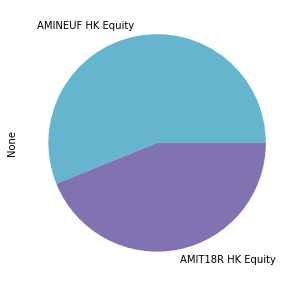

In [5]:
ef = EfficientFrontier(mu1, S1)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 6.7%
Annual volatility: 10.9%
Sharpe Ratio: 0.44


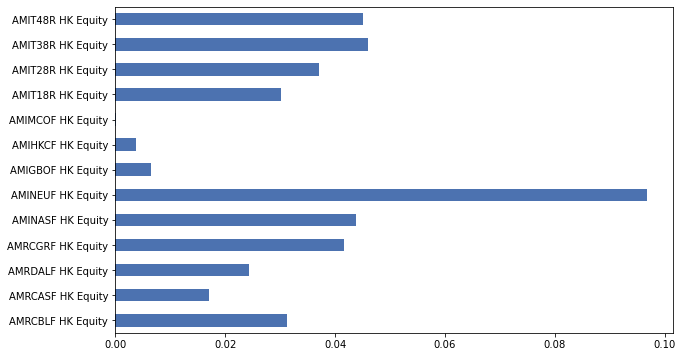

In [6]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
4.4378369389938905
Portfolio return compared to train set (+- %):
-2.309415874288211
Percentage change compared to train set (+- %):
-34.227498779089466


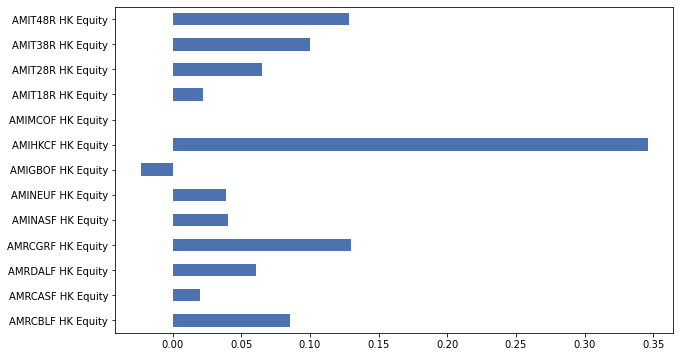

In [7]:
#calculate the asset returns in our portfolio.
ret_data = tone.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch1 = diff/ret
print(perch1)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2nd five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.74234), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.12412), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.13354), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


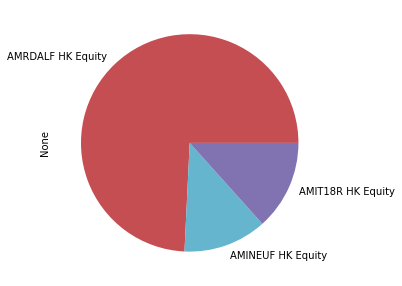

In [8]:
ef = EfficientFrontier(mu2, S2)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 4.1%
Annual volatility: 4.4%
Sharpe Ratio: 0.46


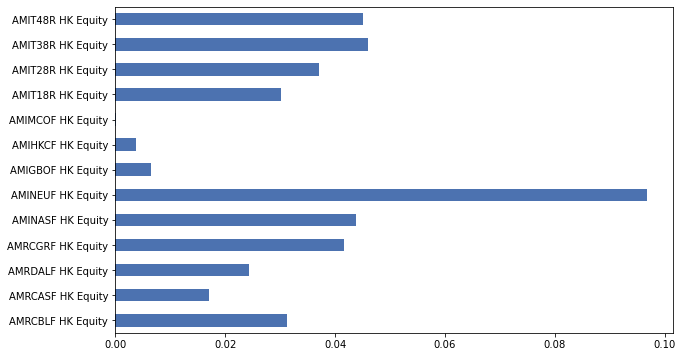

In [9]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
-5.593303062385881
Portfolio return compared to train set (+- %):
-9.647566284954266
Percentage change compared to train set (+- %):
-237.9610241202472


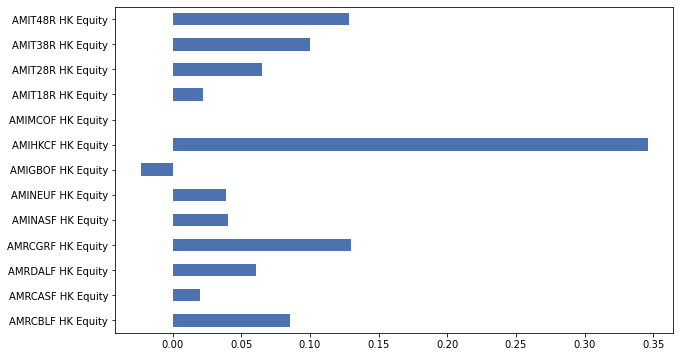

In [10]:
#calculate the asset returns in our portfolio.
ret_data = ttwo.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch2 = diff/ret
print(perch2)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 3rd five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.05351), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.60661), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.33988), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


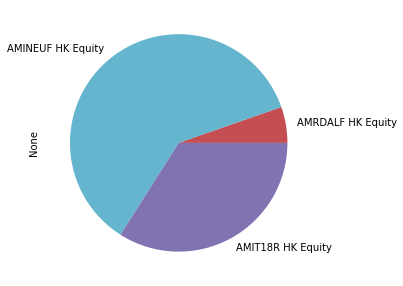

In [11]:
ef = EfficientFrontier(mu3, S3)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 4.1%
Annual volatility: 11.9%
Sharpe Ratio: 0.17


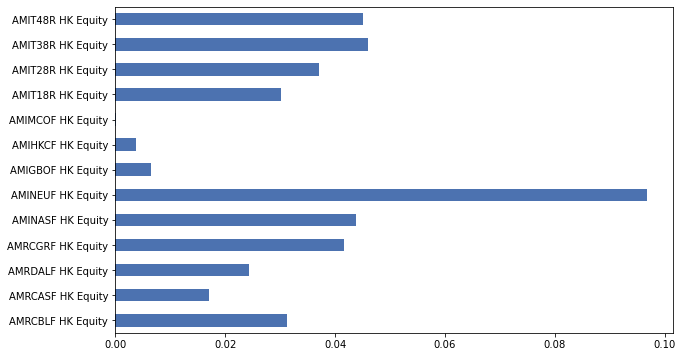

In [12]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
13.422277676535513
Portfolio return compared to train set (+- %):
9.354304376410404
Percentage change compared to train set (+- %):
229.94999441423855


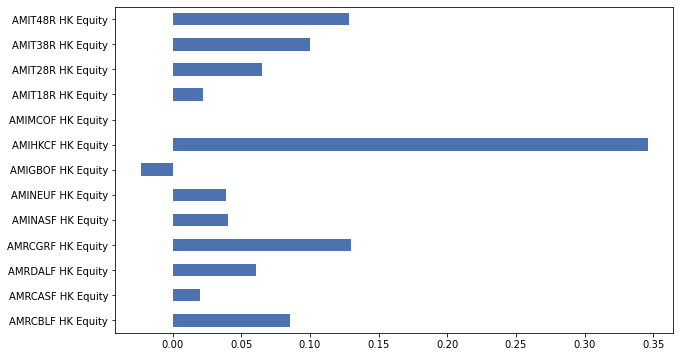

In [13]:
#calculate the asset returns in our portfolio.
ret_data = tthree.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch3 = diff/ret
print(perch3)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 4th five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.16304), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.0), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.83696)])
Performance of function 1a portfolio in train period:


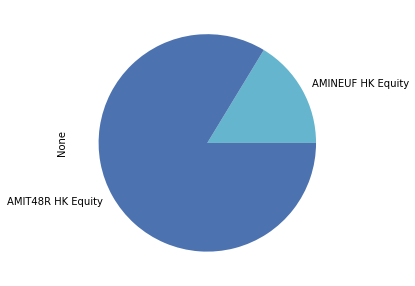

In [14]:
ef = EfficientFrontier(mu4, S4)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 7.0%
Annual volatility: 12.4%
Sharpe Ratio: 0.40


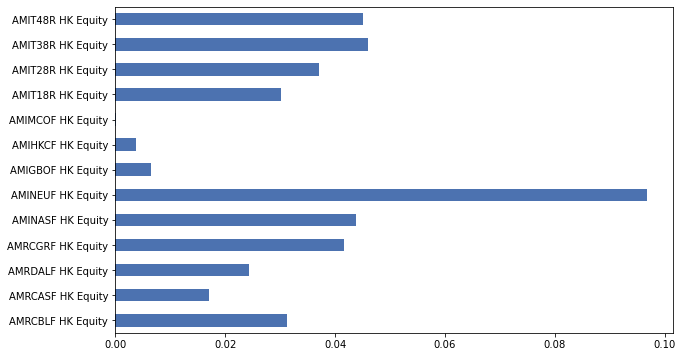

In [15]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
8.562188046952974
Portfolio return compared to train set (+- %):
1.5855743626764243
Percentage change compared to train set (+- %):
22.72699097916073


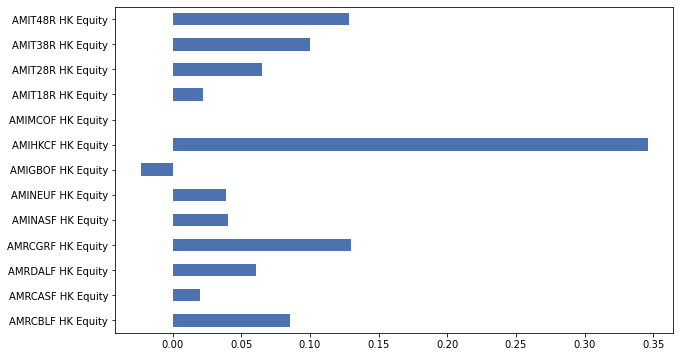

In [16]:
#calculate the asset returns in our portfolio.
ret_data = tfour.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch4 = diff/ret
print(perch4)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 5th five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.30692), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.69308), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


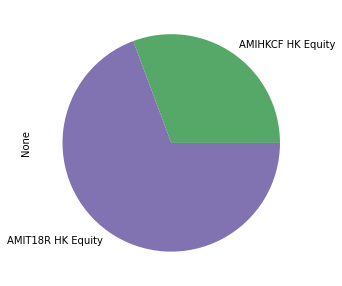

In [17]:
ef = EfficientFrontier(mu5, S5)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 5.2%
Annual volatility: 6.7%
Sharpe Ratio: 0.48


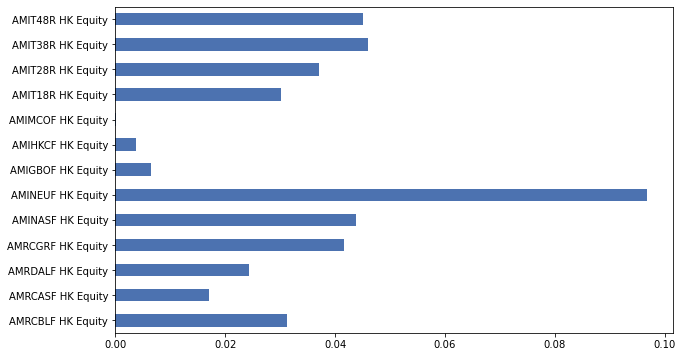

In [18]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
-0.312150438569151
Portfolio return compared to train set (+- %):
-5.50857142601693
Percentage change compared to train set (+- %):
-106.00702751611476


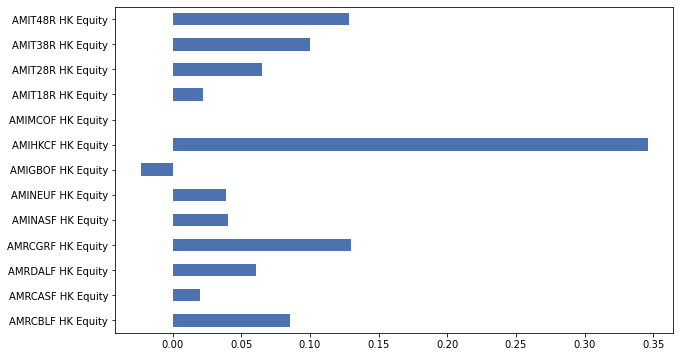

In [19]:
#calculate the asset returns in our portfolio.
ret_data = tfive.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch5 = diff/ret
print(perch5)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 6th five-year Backtesting  (for Function 1a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.4484), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.5516), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


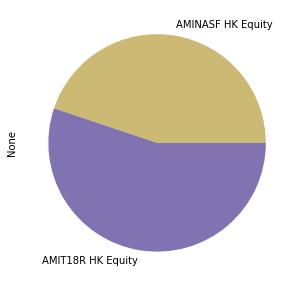

In [20]:
ef = EfficientFrontier(mu6, S6)

weight1a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 2.9%
Annual volatility: 6.5%
Sharpe Ratio: 0.14


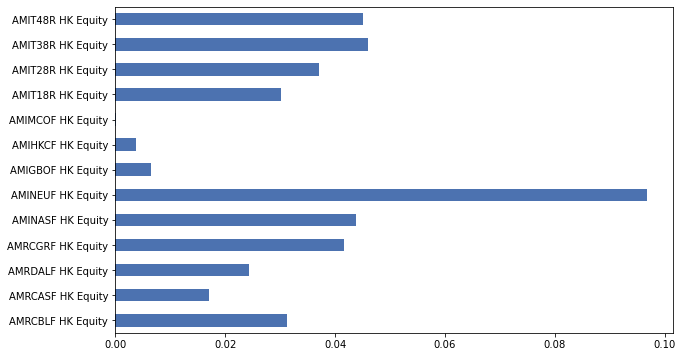

In [21]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
4.407116224925827
Portfolio return compared to train set (+- %):
1.5131697853853543
Percentage change compared to train set (+- %):
52.287415022982564


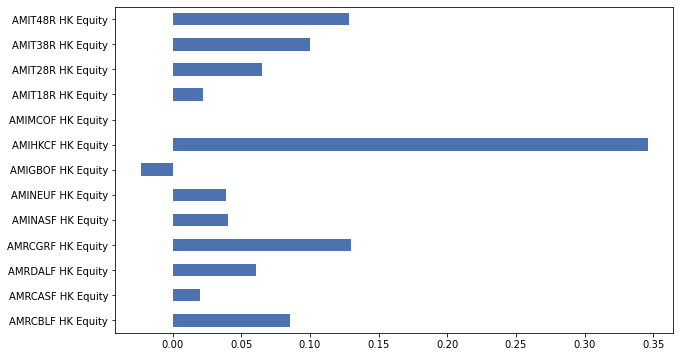

In [22]:
#calculate the asset returns in our portfolio.
ret_data = tsix.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to train set (+- %):")
diff = (sum(port_ret) - ret)*100
print(diff)
print("Percentage change compared to train set (+- %):")
perch6 = diff/ret
print(perch6)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

## Summary of Backtesting of Function 1a

In [29]:
perch_all = [perch1,perch2,perch3,perch4,perch5,perch6]
mean_perch = sum(perch_all) / len(perch_all)
print( "Function 1a Average error (%): " + str(mean_perch))
#print( "Function 1a Accuracy (%): " + str(100-mean_perch))

Function 1a Average error (%): -12.205191666511595


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Function 2a - Portfolio Optimization with given Risk Tolerance
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Text(0.5, 1.0, 'Fund Portfolio')

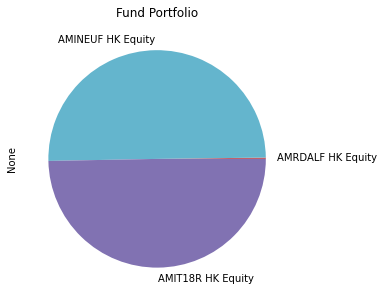

In [24]:
ef = EfficientFrontier(mu1, S1)

ef.efficient_risk(target_volatility=0.1) #input desired volatility - default as ten percent
weights = ef.clean_weights()
weights

pd.Series(weights).plot.pie(figsize=(5,5))
plt.title("Fund Portfolio")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1st five-year Backtesting  (for Function 2a)

### Run the function - what's the weighting for this period?

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMINASF HK Equity', 0.4484), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.5516), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Performance of function 1a portfolio in train period:


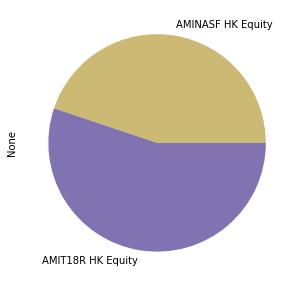

In [25]:
ef = EfficientFrontier(mu6, S6)

weight2a = ef.max_sharpe() #raw weights
cleanweight1a = ef.clean_weights() #cleaned weights
print(cleanweight1a)
print("Performance of function 1a portfolio in train period:")
pd.Series(cleanweight1a).plot.pie(figsize=(5,5))

### Comparison - Performance of Portfolio during the Train period.

Expected annual return: 2.9%
Annual volatility: 6.5%
Sharpe Ratio: 0.14


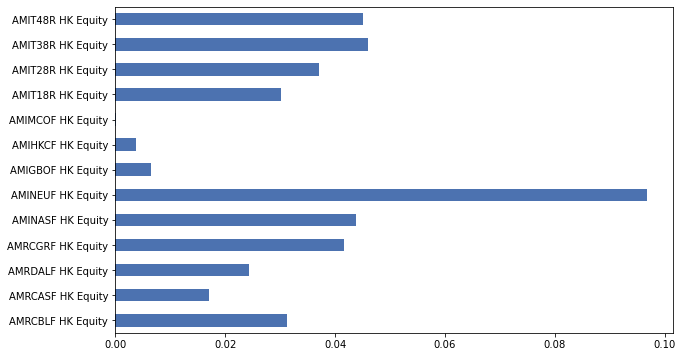

In [26]:
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

### Comparison - Performance of Portfolio during the Validation period.

Portfolio return in test year(%):
3.5333303159001517
Portfolio return compared to previous year(+- %):
0.6393838763596789


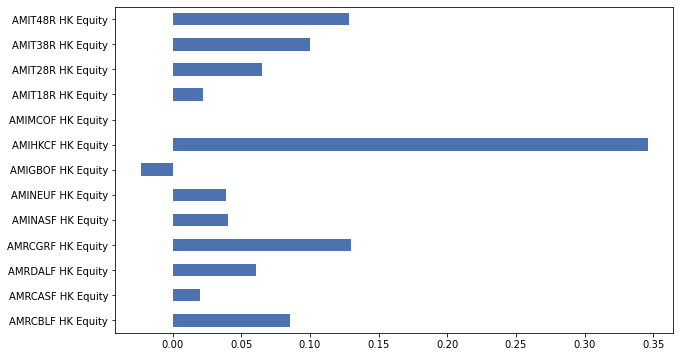

In [27]:
#calculate the asset returns in our portfolio.
ret_data = tone.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (cleanweight1a * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to previous year(+- %):")
print((sum(port_ret) - ret)*100)

tmu1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 3 - Minimise risk for a given return

In [28]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.04, market_neutral=True)
weights = ef.clean_weights()
weights

NameError: name 'mu' is not defined

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting Efficient Frontier

In [ ]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This scheme in a nutshell:

##         Any portfolio with volatility higher than 3.4% is bad because you earn the same afterwards. The highest return you can get is 10.6%.

In [ ]:
risktolerance, annualreturn = [], []
for rt2 in np.arange(0.012, 1, 0.001):
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    ret, volatility, Sharpe = ef.portfolio_performance(verbose=True)
    annualreturn.append(ret)
    risktolerance.append(rt2)


In [ ]:
plt.plot(annualreturn, risktolerance)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)